In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [2]:
import metric_learn

In [3]:
%pylab inline
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

Populating the interactive namespace from numpy and matplotlib


### Explore the shape and data included in the spectra files on an example

In [4]:
data = pd.read_csv('Critical_KMONs/2017-1-11-17-18-23_DET7AKMON_PodA_CHA_KMON_Step0_spectra_A.csv')
data.head()

,Name,Run Time,200.0,200.5,201.0,201.5,202.0,202.5,203.0,203.5,...,795.5,796.0,796.5,797.0,797.5,798.0,798.5,799.0,799.5,800.0
0,A,2.0,753,742,733,724,714,709,705,704,...,869,824,901,1280,1552,1414,952,872,1080,1081
1,A,4.0,957,926,898,870,846,829,816,806,...,1215,1110,1288,2261,2954,2596,1424,1228,1758,1747
2,A,6.0,1065,1024,985,945,912,887,872,858,...,1216,1110,1290,2223,2890,2548,1420,1227,1733,1718
3,A,8.0,1066,1022,984,947,914,886,873,861,...,1205,1103,1279,2175,2814,2485,1401,1212,1700,1693
4,A,10.0,1068,1025,985,947,913,889,868,857,...,1194,1094,1264,2140,2768,2449,1390,1203,1680,1671


In [5]:
data.shape

(362, 1203)

In [6]:
# here we adjust the df's row and column indexes 
data_df = data.rename(columns ={'Run Time':'Time'}, inplace = True)
data_df = data.drop('Name', 1)
data_df.set_index('Time', inplace = True)
data_df.columns.name = 'Wavelength'

data_df.head()

Wavelength,200.0,200.5,201.0,201.5,202.0,202.5,203.0,203.5,204.0,204.5,...,795.5,796.0,796.5,797.0,797.5,798.0,798.5,799.0,799.5,800.0
Time,,,,,,,,,,,,,,,,,,,,,
2.0,753,742,733,724,714,709,705,704,702,698,...,869,824,901,1280,1552,1414,952,872,1080,1081
4.0,957,926,898,870,846,829,816,806,801,794,...,1215,1110,1288,2261,2954,2596,1424,1228,1758,1747
6.0,1065,1024,985,945,912,887,872,858,848,841,...,1216,1110,1290,2223,2890,2548,1420,1227,1733,1718
8.0,1066,1022,984,947,914,886,873,861,852,843,...,1205,1103,1279,2175,2814,2485,1401,1212,1700,1693
10.0,1068,1025,985,947,913,889,868,857,850,842,...,1194,1094,1264,2140,2768,2449,1390,1203,1680,1671


In [7]:
data_np = data_df.values
data_np

array([[  753,   742,   733, ...,   872,  1080,  1081],
       [  957,   926,   898, ...,  1228,  1758,  1747],
       [ 1065,  1024,   985, ...,  1227,  1733,  1718],
       ..., 
       [65534, 62736, 51964, ..., 11869, 23117, 22547],
       [65534, 62725, 51960, ..., 11845, 23121, 22533],
       [65534, 62684, 51903, ..., 11839, 23112, 22546]], dtype=int64)

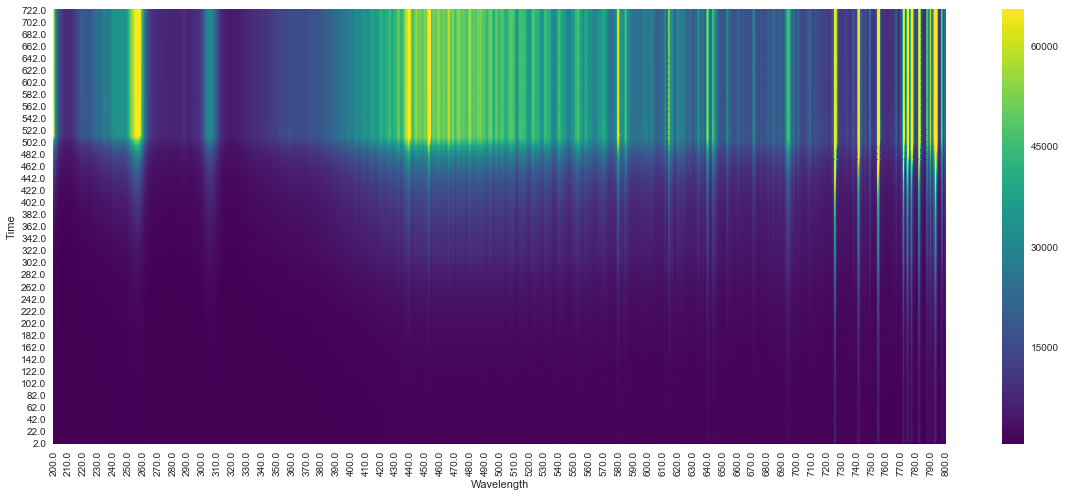

In [8]:
#create seaborn heatmap of data
sns.set_context(rc={"figure.figsize": (20,8)})                                   #increase figure size
ax = sns.heatmap(data_df, xticklabels = 20, yticklabels = 10, cmap='viridis')
ax.invert_yaxis()                                                                #invert Y axis 


### Not a great resolution in the heatmap.  Range of intensity scales from hundreds to >60k.  Let's do a log rescale to see  if the data looks better.


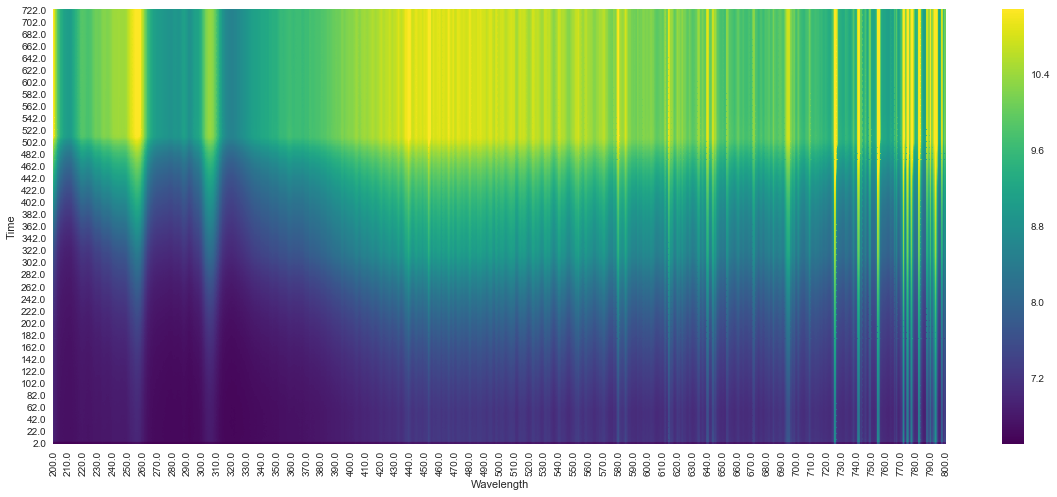

In [9]:
#log scale of data for our heatmap  

ax = sns.heatmap(log(data_df), xticklabels = 20, yticklabels = 10, cmap='viridis')
ax.invert_yaxis()                                                                   #invert Y axis 

In [10]:
#look at the range of data for each column.  What is the max and min range of the columns in the dataset.
range_df = data_df.max() - data_df.min()
print(range_df.max())
print(range_df.min())
#range_df

64781
4539


In [11]:
#scaling the df by subtracting the starting row from all cells, thus each column starts at 0
scaled_df = (data_df - data_df.iloc[0,:] )
print (scaled_df.tail())

Wavelength  200.0  200.5  201.0  201.5  202.0  202.5  203.0  203.5  204.0  \
Time                                                                        
716.0       64781  62002  51259  33789  27472  22769  19162  16428  14364   
718.0       64781  61967  51200  33776  27480  22713  19138  16417  14341   
720.0       64781  61994  51231  33748  27449  22733  19173  16423  14337   
722.0       64781  61983  51227  33784  27478  22755  19144  16420  14353   
724.0       64781  61942  51170  33795  27460  22724  19143  16414  14337   

Wavelength  204.5  ...    795.5  796.0  796.5  797.0  797.5  798.0  798.5  \
Time               ...                                                      
716.0       12819  ...    11071   8814  12487  32776  46985  39129  14540   
718.0       12798  ...    11096   8826  12482  32772  46971  39107  14527   
720.0       12801  ...    11058   8818  12518  32777  46974  39119  14529   
722.0       12805  ...    11075   8820  12500  32788  46996  39129  14520  

In [12]:
#scaling the df by taking the log
log_df = log(data_df)
rangelog_df = (log_df.max()-log_df.min())
print (rangelog_df.min())
print (rangelog_df.max())

2.0402649452
4.46625914312


Log scale is much better.
Total time is 722s
EP time near 510s is evident, remainder of time is what is known as overetch.  This portion determines the etched feature profile and final CD.  We may consider using log_df when performing data analysis later.


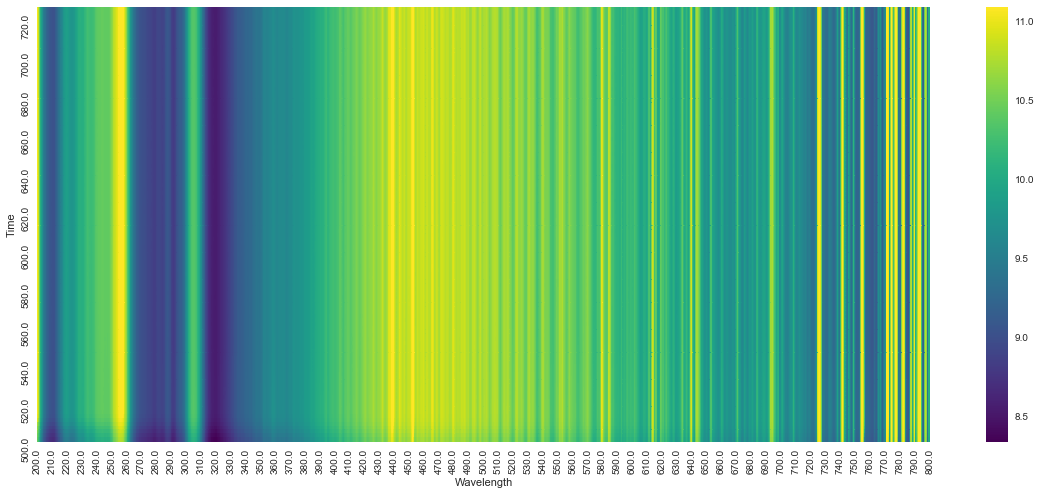

In [13]:
# let's zoom in on the overetch portion >500s.  this shows a bit more detail in the latter third of processing.

df_gt500 = data_df.ix[500:]                                                         #slice from 500s to last row
ax = sns.heatmap(log(df_gt500), xticklabels = 20, yticklabels = 10, cmap='viridis')
ax.invert_yaxis()                                                                   #invert Y axis 

### Having looked at the data file for shape and conventions used in the files, we now need to get all the training data from csv files 

In [14]:
'''
need to scroll through my training data and open the csv files into a df.  will store this is a dict of key:value pairs
key = string filename that includes the IMOxxxxxx identifier which will be used to match to 'Error' value 
value = dataframe made up of the csv file data 
'''
import glob
import pprint

dataLists = {}                                                      #initialize our dict to be filled w df's from csv files

for datafile in sorted(glob.glob(r"\\Imoshare010\dryetch$\TetraX_DET07_EyeD\OES_csv_spectra_A\*spectra_A_IMO*")):   #use glob to aggregate files/folders into our dict
    '''perform the column indexing and transposing to get each df in correct format.'''
    df = pd.read_csv(datafile)  
    df.rename(columns ={'Run Time':'Time'}, inplace = True)
    df = df.drop('Name', 1)
    df.set_index('Time', inplace = True)
    df.columns.name = 'Wavelength'
    
    '''Need to match the Label categorization for the lots'''
    
    
    
    
    '''End matching'''
    id = str(re.findall('(?<=_A_)[A-Z0-9]+', datafile))
    df = df.iloc[0:350]                                       #will need arrays of all same length so use only the first 350 rows
    dataLists[id] = df                                        #populate dict values with each raw csv file of interest
    #dataLists[id] = log(df)                                   #populate dict values with log value csv
    
    
    print('datafiles loaded:',datafile)
    #pprint.pprint (glob.glob("Critical_KMONs/*spectra_A*"))        #checking files pulled for debug

#dataLists                                                          #check it if needed for debug
print('Last file opened:',datafile)                                                     #print last filename opened
df.head()                                                           #show the last dataframe loaded into dict

datafiles loaded: \\Imoshare010\dryetch$\TetraX_DET07_EyeD\OES_csv_spectra_A\2017-01-03-14-33-19_DET7AEP01_PodA_CHA_KMON_Step0_spectra_A_IMO294852.csv
datafiles loaded: \\Imoshare010\dryetch$\TetraX_DET07_EyeD\OES_csv_spectra_A\2017-01-08-17-44-47_DET7AEP01_PodA_CHA_KMON_Step0_spectra_A_IMO305019.csv
datafiles loaded: \\Imoshare010\dryetch$\TetraX_DET07_EyeD\OES_csv_spectra_A\2017-01-11-13-44-05_DET7AEP01_PodB_CHA_KMON_Step0_spectra_A_IMO308131.csv
datafiles loaded: \\Imoshare010\dryetch$\TetraX_DET07_EyeD\OES_csv_spectra_A\2017-01-11-17-18-23_DET7AKMON_PodA_CHA_KMON_Step0_spectra_A_IMO308056.csv
datafiles loaded: \\Imoshare010\dryetch$\TetraX_DET07_EyeD\OES_csv_spectra_A\2017-01-11-23-36-27_DET7AEP01_PodA_CHA_KMON_Step0_spectra_A_IMO306885.csv
datafiles loaded: \\Imoshare010\dryetch$\TetraX_DET07_EyeD\OES_csv_spectra_A\2017-01-13-13-46-51_DET7AEP02_PodB_CHA_KMON_Step0_spectra_A_IMO308310.csv
datafiles loaded: \\Imoshare010\dryetch$\TetraX_DET07_EyeD\OES_csv_spectra_A\2017-01-13-20-31-

Wavelength,200.0,200.5,201.0,201.5,202.0,202.5,203.0,203.5,204.0,204.5,...,795.5,796.0,796.5,797.0,797.5,798.0,798.5,799.0,799.5,800.0
Time,,,,,,,,,,,,,,,,,,,,,
2.0,736,728,720,710,704,699,694,693,693,691,...,876,834,910,1307,1571,1416,956,879,1099,1090
4.0,917,890,864,839,820,803,795,788,782,776,...,1259,1142,1347,2415,3135,2717,1463,1278,1861,1828
6.0,1045,1003,965,928,898,877,860,847,838,830,...,1262,1148,1358,2390,3081,2674,1462,1281,1844,1812
8.0,1053,1010,970,931,902,880,862,849,839,830,...,1251,1142,1342,2346,3019,2625,1451,1269,1810,1778
10.0,1052,1008,967,930,905,878,860,849,838,828,...,1249,1143,1334,2325,2993,2607,1448,1264,1791,1763


In [15]:
#we can see the number of data points available that have spectra <- not all of these will have an 'Error' value but all 
#runs with an 'Error' should be found.  Verify later in code.
print (len(dataLists))

170


### The above sequence of code has loaded all of the datasets into a dictionary of dataframes that each represents a run of data that will be labeled according to the corresponding Error for that lot.

In [151]:
'''#pull in the files containing Error data which will be used to define anomylous vs. non-anom '''

raw_Errors = pd.read_csv('7AToy_Shared_WorkingFile.csv')
raw_Errors[400:455]

,Entity,Run_On_Ent,Lot,Op,Error,Feature1,Feature2,Feature3,Feature4,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Fam_Type,DIC_Design
400,7A,401,308628A,3514,NaN,250,17,6.0,2.0,1,1,1,0,0,NaN,NaN
401,7A,402,304914A,3524,NaN,800,12,1.5,5.0,0,1,0,0,1,NaN,NaN
402,7A,403,308630,3524,NaN,800,30,1.5,10.0,0,1,1,1,1,NaN,NaN
403,7A,404,308352,3504,NaN,250,70,1.5,4.0,0,1,1,1,0,NaN,NaN
404,7A,405,307809,3504,NaN,250,70,1.5,4.0,0,1,1,1,0,NaN,NaN
405,7A,406,308352,3524,NaN,800,12,1.5,5.0,0,1,0,1,1,NaN,NaN
406,7A,407,303866,3514,NaN,250,17,6.0,2.0,1,1,1,0,0,NaN,NaN
407,7A,408,306319,3554,NaN,400,17,6.0,2.0,1,1,0,1,1,NaN,NaN
408,7A,409,308290,3504,NaN,250,70,1.5,4.0,0,1,1,1,0,NaN,NaN
409,7A,410,307809,3524,NaN,800,12,1.5,5.0,0,1,0,1,1,NaN,NaN


In [17]:
raw_Errors.Error.dropna().describe()

count    144.000000
mean       0.177785
std        0.730176
min       -3.522000
25%       -0.284500
50%        0.185500
75%        0.638500
max        2.005000
Name: Error, dtype: float64

### 'raw_Errors' dataframe has a target column called 'Error' which is being used to demark which points are defined as anomylous vs non-anom.  The absolute value of distance to zero is the metric I will used here.  I will use a 2sigma cutoff to assign 

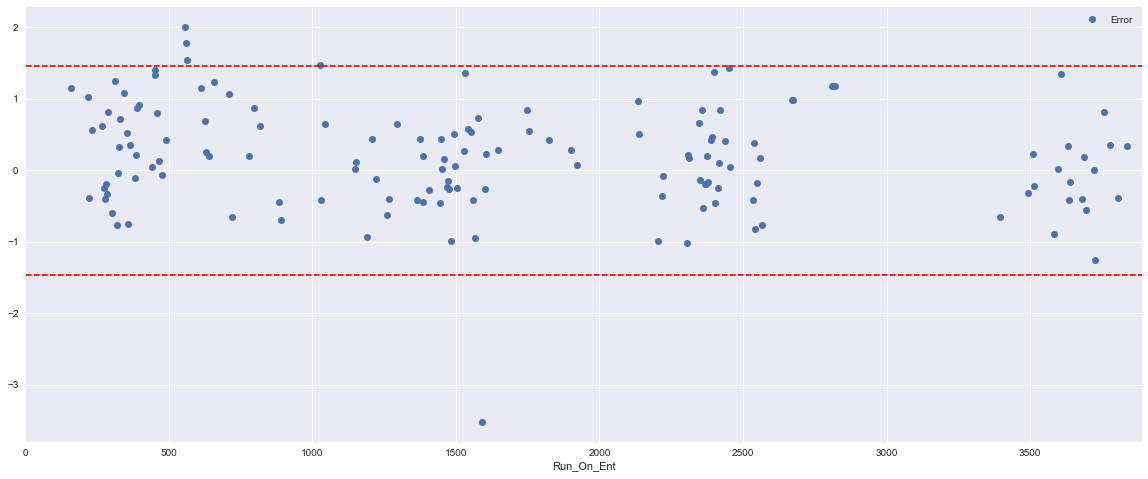

In [20]:
'''scatterplot with 2s cutoff lines shown'''
stdcut = 2   #number of standard deviation to draw the cutoff for anomalous pts.
cutoff = stdcut * raw_Errors.Error.std()
raw_Errors.plot(x = 'Run_On_Ent', y = 'Error', style = 'o')
plt.axhline(y=-cutoff, c = 'r', linestyle = '--')
plt.axhline(y=cutoff, c = 'r', linestyle = '--')

In [87]:
'''
Cell creates a new dataframe with the data pts labeled as anomylous = 1, non-anom = 0
'''
raw_Errors2 = raw_Errors.set_index('Run_On_Ent').dropna()                  #reset index to run order
clas_Errors = raw_Errors2[['Entity','Lot','Error']].copy()                 #copy columns needed for analysis to new df
clas_Errors["Label"] = np.where(abs(clas_Errors['Error']) > cutoff, 1, 0)  #classify pt as anom or non-anom
                              
#clas_Errors.set_index('Lot', inplace = True)
clas_Errors.loc[clas_Errors['Label'] == 1].count()                                 #show anomylous rows ('Label' = 1)


Entity    5
Lot       5
Error     5
Label     5
dtype: int64

In [104]:
clas_Errors.loc[clas_Errors['Label'] == 1]
clas_Errors = clas_Errors.reset_index()

### we can see there will be 32 anomalous pts possible in the Errors data.  They must have a match to the 491 datafiles available in dataLists.  Our max is 32/491 if all are found.

In [105]:
clas_Errors

,Run_On_Ent,Entity,Lot,Error,Label
0,160,7A,305019,1.147,0
1,218,7A,308131,1.017,0
2,223,7A,308056,-0.391,0
3,231,7A,306885,0.558,0
4,268,7A,308310,0.622,0
5,275,7A,308058,-0.255,0
6,278,7A,307365,-0.406,0
7,280,7A,308059,-0.189,0
8,285,7A,307366,-0.340,0
9,287,7A,306641,0.817,0


In [90]:
print (len(dataLists)) 

170


In [106]:
#checking and saving matches between Errors and spectra available.
dataLists2 = {}
matchcounter = 0
missingcounter = 0
for k in dataLists:
    #print ('k=',k)
    id = re.findall('(?<=IMO)[A-Z0-9]+', k)[0]
    #print('id=',id)
    ndf = clas_Errors[clas_Errors.Lot == id]    ###clas_Errors.index if we index in the table of cell above
    if len(ndf) > 0:
        category = (ndf.iloc[-1]['Label'])
        error = (ndf.iloc[-1]['Error'])
        run = (ndf.iloc[-1]['Run_On_Ent'])
        dataLists2[k] = (category, run, error, dataLists[k])
        matchcounter +=1
        #print(dataLists2[k])
    else: 
        '''Lot not in dataLists'''
        #dataLists2[k] = (None, dataLists[k])  --> don't keep non-matching data
        missingcounter += 1
        #print ('not found', id)
        continue
print ('missing', missingcounter)
print ('match', matchcounter)
#dataLists2

missing 46
match 124


In [107]:
dataLists2

{"['IMO294847']": (0,
  1900,
  0.28600000000000003,
  Wavelength  200.0  200.5  201.0  201.5  202.0  202.5  203.0  203.5  204.0  \
  Time                                                                        
  2.0           742    732    722    712    704    699    698    696    694   
  4.0           943    912    883    857    833    816    805    797    791   
  6.0          1058   1016    978    939    909    888    865    854    844   
  8.0          1067   1022    979    941    907    886    867    855    846   
  10.0         1069   1025    983    940    907    885    868    855    845   
  12.0         1067   1021    979    940    909    888    867    855    844   
  14.0         1063   1019    977    940    908    884    865    853    843   
  16.0         1070   1029    984    943    913    887    868    854    843   
  18.0         1069   1026    984    941    914    889    868    856    847   
  20.0         1073   1027    983    944    910    887    868    855    845   

In [27]:
# right away we are missing 90 runs in our spectra that are not in the clas_Errors (not error data available)

In [111]:
y = {} # our labels
X = {} # our spectra data
E = {}
cnt = 0
for k,(label, run, error, spectra) in dataLists2.items():
    y[k] = label
    X[k] = spectra
    E[k] = run, error
    if label == 1: cnt +=1
    last = k
print ('last key', k)
#X[k].head()
y_lotlabel = dict(y)

print ('found anomylous pts:', cnt)
print ('total pts:', len(y))
y_lotlabel.values()

last key ['IMO318134A']
found anomylous pts: 4
total pts: 124


dict_values([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [112]:
E

{"['IMO294847']": (1900, 0.28600000000000003),
 "['IMO296151']": (3778, 0.34499999999999997),
 "['IMO298422']": (1753, 0.54100000000000004),
 "['IMO304908']": (312, 1.248),
 "['IMO305019']": (160, 1.147),
 "['IMO305020']": (450, 1.401),
 "['IMO306182']": (465, 0.122),
 "['IMO306184A']": (780, 0.191),
 "['IMO306185']": (475, -0.070999999999999994),
 "['IMO306601B']": (328, 0.71400000000000008),
 "['IMO306641']": (287, 0.81700000000000006),
 "['IMO306641A']": (563, 1.5369999999999999),
 "['IMO306885']": (231, 0.55799999999999994),
 "['IMO306942A']": (321, -0.039),
 "['IMO307051A']": (718, -0.65200000000000002),
 "['IMO307051B']": (798, 0.87400000000000011),
 "['IMO307087A']": (353, 0.51600000000000001),
 "['IMO307236']": (318, -0.77500000000000002),
 "['IMO307365']": (278, -0.40600000000000003),
 "['IMO307366']": (285, -0.34000000000000002),
 "['IMO307685']": (383, -0.11800000000000001),
 "['IMO307686']": (357, -0.74900000000000011),
 "['IMO307860']": (385, 0.20600000000000002),
 "['IMO3

### Now we see our dataset is 33 anomalous pts out of 401 available

In [114]:
print('length of X should match 401:', len(X))

length of X should match 401: 124


### unpack the dictionary tuples to make numpy arrays of the values for labels and spectra and prep the data formats into ndarrays suitable for sklearn modules.

In [133]:

y = [] # our labels list
X = [] # our spectra data
y_lotlabel2 = {}

for k,(label, run, error, spectra) in dataLists2.items():
    items = [label, run, error]
    y.append(label)
    X.append(spectra.values)
    y_lotlabel2[k] = items
#    if spectra.shape[0] < minim: minim = spectra.shape[0]
    last = k
    #print (y, k, '\n')
    
print(type(X))
#print('minum')

y = (numpy.array(y))  
X = (numpy.array(X))       #give me a 3-D array (124,350,1201)
print('X shape:', X.shape)
print('y shape:', y.shape)
#print(X)

# sklearn will require 2D array for data input so we will flattend 3D array to 2D 350x1201 = 42350
nsamples,nx,ny = X.shape
d2_X = X.reshape((nsamples,nx*ny))
print('reshaped d2_X:', d2_X.shape)
print('labels y shape:', len(y))
print('X shape:', X.shape)
#print('last spectra array \n',X[-1])

<class 'list'>
X shape: (124, 350, 1201)
y shape: (124,)
reshaped d2_X: (124, 420350)
labels y shape: 124
X shape: (124, 350, 1201)


In [134]:
y_lotlabel2

{"['IMO294847']": [0, 1900, 0.28600000000000003],
 "['IMO296151']": [0, 3778, 0.34499999999999997],
 "['IMO298422']": [0, 1753, 0.54100000000000004],
 "['IMO304908']": [0, 312, 1.248],
 "['IMO305019']": [0, 160, 1.147],
 "['IMO305020']": [0, 450, 1.401],
 "['IMO306182']": [0, 465, 0.122],
 "['IMO306184A']": [0, 780, 0.191],
 "['IMO306185']": [0, 475, -0.070999999999999994],
 "['IMO306601B']": [0, 328, 0.71400000000000008],
 "['IMO306641']": [0, 287, 0.81700000000000006],
 "['IMO306641A']": [1, 563, 1.5369999999999999],
 "['IMO306885']": [0, 231, 0.55799999999999994],
 "['IMO306942A']": [0, 321, -0.039],
 "['IMO307051A']": [0, 718, -0.65200000000000002],
 "['IMO307051B']": [0, 798, 0.87400000000000011],
 "['IMO307087A']": [0, 353, 0.51600000000000001],
 "['IMO307236']": [0, 318, -0.77500000000000002],
 "['IMO307365']": [0, 278, -0.40600000000000003],
 "['IMO307366']": [0, 285, -0.34000000000000002],
 "['IMO307685']": [0, 383, -0.11800000000000001],
 "['IMO307686']": [0, 357, -0.74900000

In [121]:
#reset y labels to match the y given by HOG-CondT-tSNE
malign_rows = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23,
               24, 25, 27, 28, 29, 30,31, 32, 33, 34, 35, 36, 37, 38, 40, 41, 43, 44]

In [144]:
new_ys = []
items = []
cnt = 1
for k,(label, run, error) in y_lotlabel2.items():
    print (k, label, run, error)
    if cnt in malign_rows:
        label = 1
    else: label = 0
    cnt += 1
    items = (k, label, run, error)
    new_ys.append(items)
#new_ys

['IMO305019'] 0 160 1.147
['IMO308131'] 0 218 1.017
['IMO308056'] 0 223 -0.391
['IMO306885'] 0 231 0.558
['IMO308310'] 0 268 0.622
['IMO308058'] 0 275 -0.255
['IMO307365'] 0 278 -0.406
['IMO308059'] 0 280 -0.189
['IMO307366'] 0 285 -0.34
['IMO306641'] 0 287 0.817
['IMO308311'] 0 301 -0.602
['IMO304908'] 0 312 1.248
['IMO307236'] 0 318 -0.775
['IMO306942A'] 0 321 -0.039
['IMO308631'] 0 326 0.316
['IMO306601B'] 0 328 0.714
['IMO308697'] 0 342 1.071
['IMO307087A'] 0 353 0.516
['IMO307686'] 0 357 -0.749
['IMO308499'] 0 366 0.35
['IMO307685'] 0 383 -0.118
['IMO307860'] 0 385 0.206
['IMO308920'] 0 388 0.868
['IMO308917'] 0 395 0.911
['IMO308629A'] 0 440 0.04
['IMO305020'] 0 450 1.401
['IMO308913'] 0 453 1.323
['IMO308131A'] 0 459 0.799
['IMO306182'] 0 465 0.122
['IMO306185'] 0 475 -0.071
['IMO308919'] 0 490 0.421
['IMO308055A'] 1 556 2.005
['IMO308501'] 1 560 1.782
['IMO306641A'] 1 563 1.537
['IMO309216A'] 0 629 0.259
['IMO309050'] 0 658 1.238
['IMO308500'] 0 711 1.068
['IMO307051A'] 0 718 -

In [ ]:
#-------------------------------------------------------------------------------------

In [158]:
columns = ['id', 'label', 'Run_On_Ent', 'Error']
new_ys_df = pd.DataFrame(new_ys, columns = columns)
#new_ys_df.head()
new_ys_df[new_ys_df['label'] == 0].head()

,id,label,Run_On_Ent,Error
25,['IMO305020'],0,450,1.401
38,['IMO306184A'],0,780,0.191
41,['IMO309801'],0,885,-0.445
44,['IMO310176'],0,1031,-0.417
45,['IMO309800'],0,1149,0.014


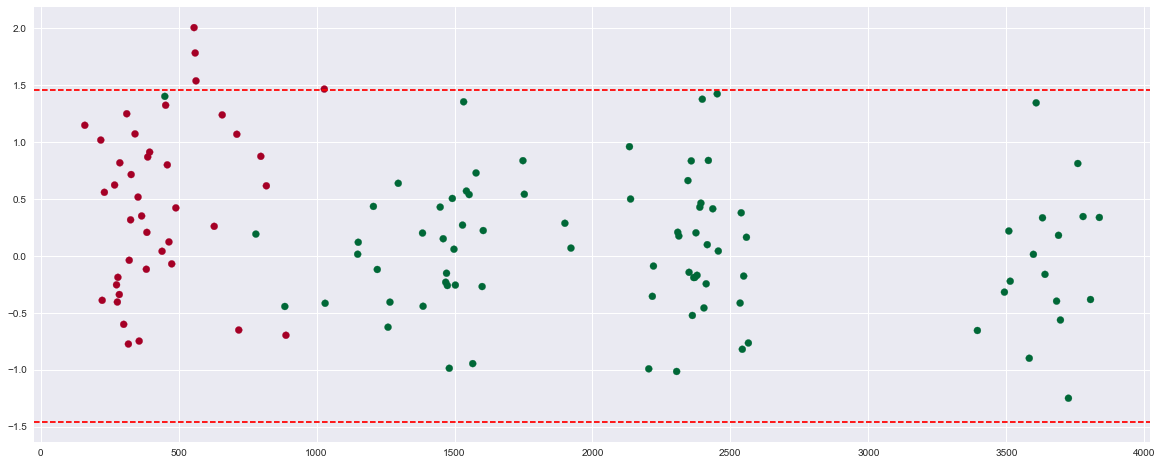

In [159]:
'''scatterplot with 2s cutoff lines shown'''
cmap = plt.cm.RdYlGn
stdcut = 2   #number of standard deviation to draw the cutoff for anomalous pts.
cutoff = stdcut * raw_Errors.Error.std()
z = np.choose(new_ys_df.label, [1,0])
plt.scatter(new_ys_df['Run_On_Ent'], new_ys_df['Error'], c = z, cmap=cmap)
#raw_Errors.plot(x = 'Run_On_Ent', y = 'Error', style = 'o', c = z)
plt.axhline(y=-cutoff, c = 'r', linestyle = '--')
plt.axhline(y=cutoff, c = 'r', linestyle = '--')

### first 2 greens on 1/21/17 and 2/6/17 (gUI RUNNING SLOW)
### pm 1/28, 3/14-18, 8/25

In [67]:
#attempt metric learn  or R w toy that uses every other column to prevent MemoryErrors
X_e2c = X[:,::2] 
nsamples,nx,ny = X_e2c.shape
d2_X_e2c = X_e2c.reshape((nsamples,nx*ny))
print('reshaped d2_X:', d2_X_e2c.shape)
print('labels y shape:', len(y))
#print('last spectra array \n',X[-1])
                
#print('reshaped d2_X_toy:', d2_X_toy.shape)
#print('labels y_toy shape:', len(y_toy))

reshaped d2_X: (124, 210175)
labels y shape: 124


In [68]:
### for saving csv files in as x(good) and y(anomylous) to utilize conditional T-test in Rstudio
y_anom = []
x_good = []
for k,(label, spectra) in dataLists2.items():
    if label == 1:
        y_anom.append(spectra.values)
    else: 
        x_good.append(spectra.values)
        
#Create flattened numpy arrays for R that have samples as columns and features as rows
y_anom = (numpy.array(y_anom))  
nsamples,nx,ny = y_anom.shape
d2_y_anom = y_anom.reshape((nsamples,nx*ny))

x_good = (numpy.array(x_good))
nsamples,nx,ny = x_good.shape
d2_x_good = x_good.reshape((nsamples,nx*ny))

print (d2_y_anom.shape)
print (d2_x_good.shape)

# save csv and send to R for conditional Ttest to find the features that matter the most
#numpy.savetxt('y_anom.csv', d2_y_R_anom ,fmt='%d', delimiter=',')
#numpy.savetxt('x_good.csv', d2_x_R_good, fmt='%d', delimiter=',')

(4, 420350)
(120, 420350)


In [69]:
### for saving csv files in as x(good) and y(anomylous) to utilize conditional T-test in Rstudio
y_e2c_anom = []
x_e2c_good = []

#Create flattened numpy arrays for R that have samples using EVERY OTHER COLUMN and features as rows
y_e2c_anom = y_anom[:,::2]  
nsamples,nx,ny = y_e2c_anom.shape
d2_y_e2c_anom = y_e2c_anom.reshape((nsamples,nx*ny))

x_e2c_good = x_good[:,::2]
nsamples,nx,ny = x_e2c_good.shape
d2_x_e2c_good = x_e2c_good.reshape((nsamples,nx*ny))

print (d2_y_e2c_anom.shape)
print (d2_x_e2c_good.shape)

# save csv and send to R for conditional Ttest to find the features that matter the most
#numpy.savetxt('y_e2c_anom.csv', d2_y_Re2c_anom ,fmt='%d', delimiter=',')
#numpy.savetxt('x_e2c_good.csv', d2_x_Re2c_good, fmt='%d', delimiter=',')

(4, 210175)
(120, 210175)


# Run all above here

### Hog histogram of oriented gradients

In [70]:
print (X.shape)
print (y.shape)

(124, 350, 1201)
(124,)


C:\Users\mabock\AppData\Local\Continuum\Anaconda3\lib\site-packages\skimage\feature\_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


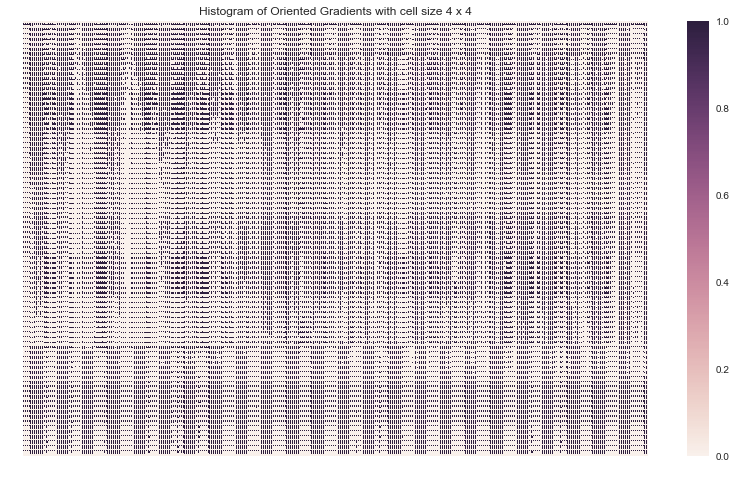

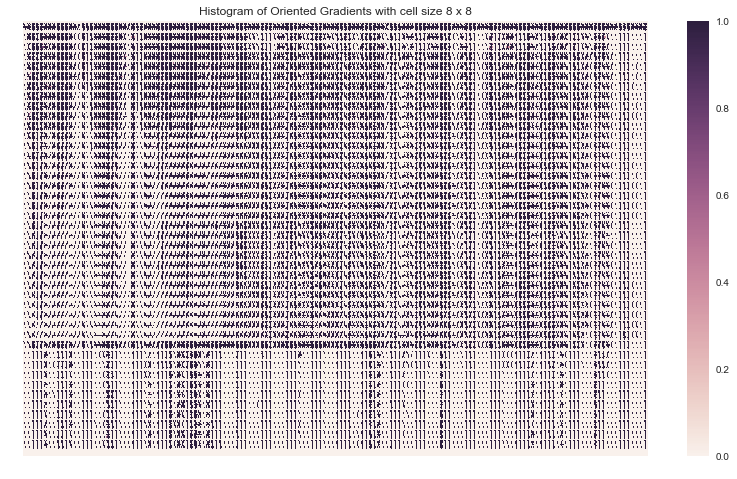

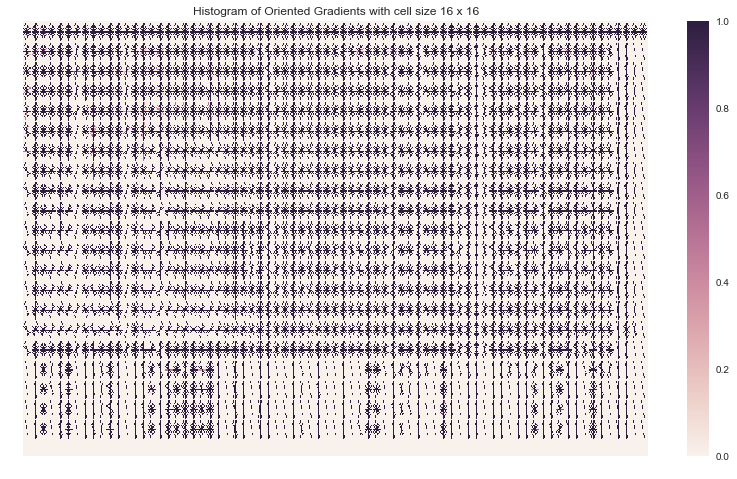

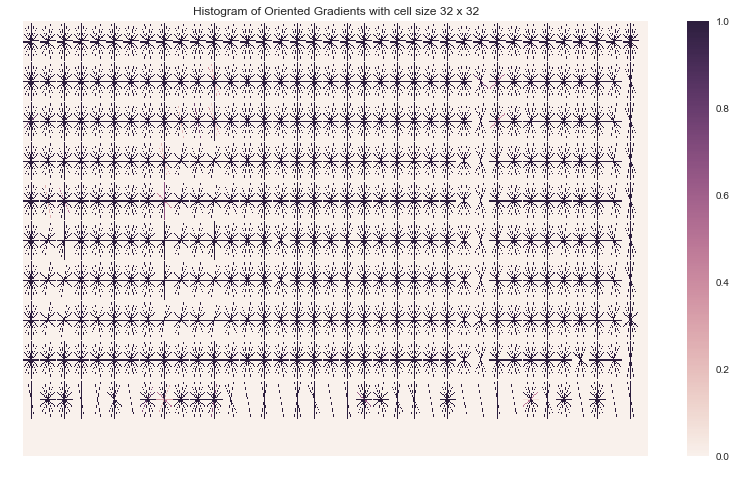

In [132]:
from skimage.feature import hog
from skimage import data, color, exposure

# check hog of first imgage across several cell pixel resolutions 

image = X[0]
ppcs = (4,8,16,32)
cnt = 0
hog_image_rescaled = {}
sns.set_context(rc={"figure.figsize": (14,8)}) 

for cell in ppcs:
    
    fd, hog_image = hog(image, orientations=8, pixels_per_cell=(cell, cell),
                        cells_per_block=(1, 1), visualise=True)
    # Rescale histogram for better display
    ax = plt.axes()
    ax.axis('off')
    hog_image_rescaled[cnt] = exposure.rescale_intensity(hog_image, in_range=(0, 0.02))
    sns.heatmap(hog_image_rescaled[cnt], ax = ax)#, cmap='viridis')
    ax.set_title('Histogram of Oriented Gradients with cell size %i x %i' %(cell,cell))
    #ax.title('Histogram of Oriented Gradients with cell size {} x {}'.format(cell))
    plt.show()
    cnt += 1

### optical emission spectra don't really have defined edges so I will use high resolution 4x4 pixel per cell

In [159]:
from skimage.feature import hog
from skimage import data, color, exposure

# get feat vector of all the heatmaps using cell size 4x4

hog_image_rescaled = []
feat_vect = []

for k in range(len(X)):
    image = X[k]
    fd, hog_image = hog(image, orientations=8, pixels_per_cell=(4, 4),
                        cells_per_block=(1, 1), visualise=True)
    feat_vect.append(fd)
    #hog_image_rescaled[k] = exposure.rescale_intensity(hog_image, in_range=(0, 0.02))
    

C:\Users\mabock\AppData\Local\Continuum\Anaconda3\lib\site-packages\skimage\feature\_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


In [160]:
FV = np.array(feat_vect)
FV.shape

(124, 208800)

In [273]:
#ISOMAP for dimensionality reduction
from sklearn import manifold

iso = manifold.Isomap(n_neighbors=4, n_components = 2)
iso.fit(FV)

HogIso_a = iso.transform(FV)
HogIso_df = pd.DataFrame(HogIso_a, columns=['Component 1', 'Component 2'])#, 'Component 3', 'Component 4'])

In [274]:
print (HogIso_df.shape)
HogIso_df.head()

(124, 2)


,Component 1,Component 2
0,162.189914,80.968348
1,-260.949825,46.432711
2,20.469034,-34.319466
3,-198.074790,32.808131
4,161.350747,42.277108


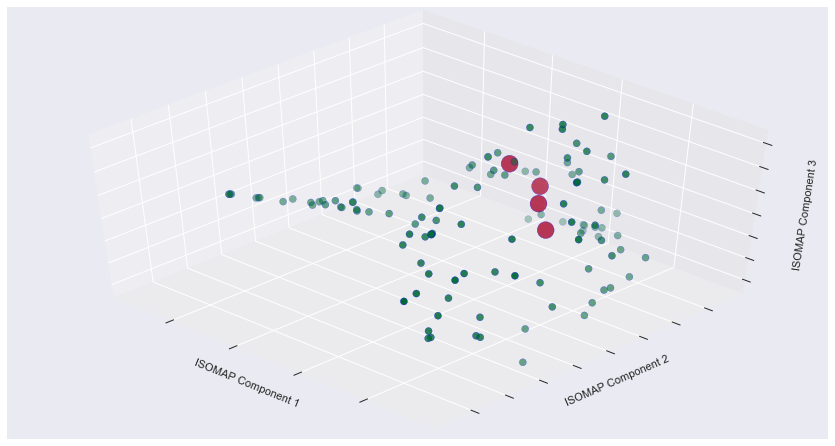

In [250]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure(1, figsize=(12, 6))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
area = 50+75*np.pi*y

#for name, label in [('normal', 0), ('Anomaly', 1)]:
#    ax.text3D(X_reduced[y == label, 0].mean(), X_reduced[y == label, 1].mean()+1.5, s = name, z = 0,
#              horizontalalignment='center', verticalalignment='center',
#              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
    
# Reorder the labels to have colors matching the cluster results
z = np.choose(y, [1,0])

ax.scatter(manifold_2D.loc[:,'Component 1'], manifold_2D.loc[:,'Component 2'], manifold_2D.loc[:,'Component 3'],\
            c=z, cmap=plt.cm.RdYlGn, s = area, edgecolor='b')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('ISOMAP Component 1')
ax.set_ylabel('ISOMAP Component 2')
ax.set_zlabel('ISOMAP Component 3')
plt.show()

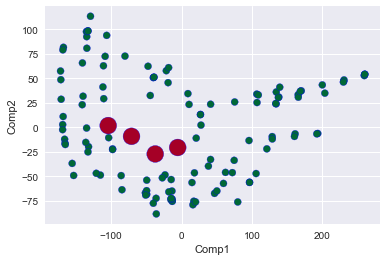

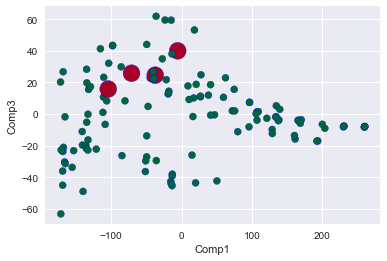

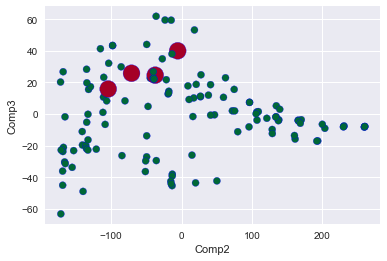

In [275]:
plt.figure()

plt.scatter(manifold_2D.loc[:,'Component 1'], manifold_2D.loc[:,'Component 2'], marker='o', c=z, cmap=plt.cm.RdYlGn, edgecolor='b', s = area)
plt.xlabel('Comp1')
plt.ylabel('Comp2')
plt.show()
plt.scatter(manifold_2D.loc[:,'Component 1'], manifold_2D.loc[:,'Component 3'], marker='o', c=z, cmap=plt.cm.RdYlGn, edgecolor='b', s = area)
plt.xlabel('Comp1')
plt.ylabel('Comp3')
plt.show()
plt.scatter(manifold_2D.loc[:,'Component 1'], manifold_2D.loc[:,'Component 3'], marker='o', c=z, cmap=plt.cm.RdYlGn, edgecolor='b', s = area)
plt.xlabel('Comp2')
plt.ylabel('Comp3')
plt.show()

In [292]:
#tSNE
from sklearn.manifold import TSNE
HogIsoTSNE_a = TSNE(n_components=2, n_iter = 10000, perplexity = 20).fit_transform(HogIso_df)
HogIsoTSNE_a.shape
HogIsoTSNE_df = pd.DataFrame(HogIsoTSNE_a, columns=['Component 1', 'Component 2'])#, 'Component 3'])
HogIsoTSNE_df.head()

,Component 1,Component 2
0,-3.508829,16.777948
1,9.296516,-12.470348
2,-0.188436,3.955760
3,7.582668,-10.213708
4,-2.653700,15.934182


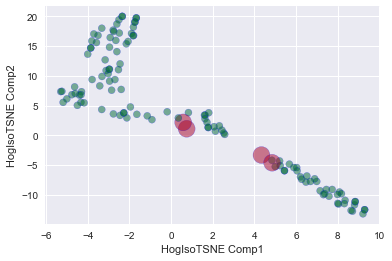

In [336]:
plt.figure()
plt.scatter(HogIsoTSNE_df.loc[:,'Component 1'], HogIsoTSNE_df.loc[:,'Component 2'], marker='o', \
            alpha = 0.5, c=z, cmap=plt.cm.RdYlGn, edgecolor='b', s = area)
plt.xlabel('HogIsoTSNE Comp1')
plt.ylabel('HogIsoTSNE Comp2')
plt.show()


# Doing tSNE then Iso on the Hog feature vector

In [328]:
from sklearn.manifold import TSNE
HogTSNE_a = TSNE(n_components=3, n_iter = 10000, perplexity = 10).fit_transform(FV)
HogTSNE_a.shape
HogTSNE_df = pd.DataFrame(HogTSNE_a, columns=['Component 1', 'Component 2', 'Component 3'])
HogTSNE_df.head()

,Component 1,Component 2,Component 3
0,125.799721,29.675163,-16.739906
1,-142.391418,-1.615596,0.829334
2,-0.683096,29.754969,3.517104
3,-112.419289,-3.303624,1.743859
4,107.215080,34.540928,-16.435801


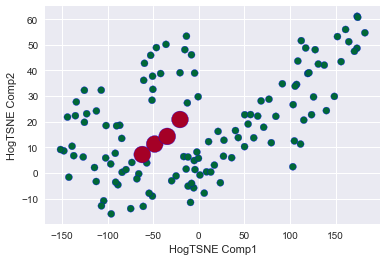

In [329]:
plt.figure()
plt.scatter(HogTSNE_df.loc[:,'Component 1'], HogTSNE_df.loc[:,'Component 2'], marker='o', c=z, cmap=plt.cm.RdYlGn, edgecolor='b', s = area)
plt.xlabel('HogTSNE Comp1')
plt.ylabel('HogTSNE Comp2')
plt.show()


In [330]:
#ISOMAP for dimensionality reduction
from sklearn import manifold

iso = manifold.Isomap(n_neighbors=4, n_components = 2)
iso.fit(HogTSNE_df)

HogTSNEIso_a = iso.transform(HogTSNE_df)
HogTSNEIso_df = pd.DataFrame(HogTSNEIso_a, columns=['Component 1', 'Component 2'])

In [331]:
print (HogTSNEIso_df.shape)
HogTSNEIso_df.head()

(124, 2)


,Component 1,Component 2
0,151.550472,-9.203336
1,-161.695734,-42.375279
2,-39.799531,56.769272
3,-119.619177,-23.363367
4,133.057369,-5.030389


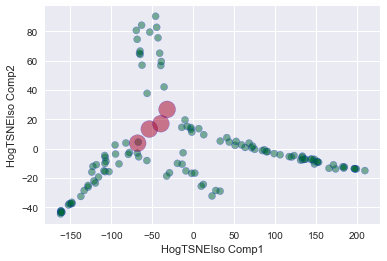

In [335]:
plt.figure()

plt.scatter(HogTSNEIso_df.loc[:,'Component 1'], HogTSNEIso_df.loc[:,'Component 2'], \
            alpha = 0.5, marker='o', c=z, cmap=plt.cm.RdYlGn, edgecolor='b', s = area)
plt.xlabel('HogTSNEIso Comp1')
plt.ylabel('HogTSNEIso Comp2')
plt.show()
